## Homework

<img align="left" style="padding-left:1px;" src="Dataset/CDNOW.jpg">


### 数据来源： CDNow 网站的用户购买明细

### 任务要求：利用所学知识对以上数据进行分析

### 分析导图如下所示：
<img align="left" style="padding-left:1px;" src="Dataset/Analysis_Mind.png">

> - ## 数据来源

> ** CDNow 网站的用户购买明细**

> - ## 分析目的

> ** 根据 CDNow 网站的用户购买明细数据，分析用户的消费行为**

> - ## 分析思路

> ** 原始数据没有提供分析目的的用户行为数据，需要通过已知的数据构建分析思路，并结合分析导图，更好地分析用户的消费行为**

> - ## 分析内容

> - **商品销售静态分析**

> - **商品销售动态分析**

> - **用户消费行为静态分析**

> - **用户消费行为动态分析**

> - ## 任务实现

> ### 1. 数据导入

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# 列名分别为：用户id、购买日期、购买数量、购买金额
columns = ['User_id','Order_dt','Order_product','Order_amount']
# DataFrame默认情况下，Hheader为None，即不包含表头，通过names属性名显示自定义的表头信息
# sep = '\s+' 表示匹配任意空白符
CDNow = pd.read_table("Dataset/CDNOW.txt", names = columns, sep = '\s+') 

In [3]:
# 查看前五行数据
CDNow.head()

,User_id,Order_dt,Order_product,Order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
# 查看数据信息有误缺失值的情况
CDNow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
User_id          69659 non-null int64
Order_dt         69659 non-null int64
Order_product    69659 non-null int64
Order_amount     69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


> **合计共有69659条实体记录，皆不存在NAN（缺失值），不需要对缺失值进行处理**

In [5]:
CDNow.describe()

,User_id,Order_dt,Order_product,Order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


> - **mean均值：用户平均订单量约为2.4**


> - **std标准差：约为2.3，有一定的波动**


> - **50%中位数：为2**


> - **75%分位数：为3，绝大多数订单量不很乐观，购买金额大多数在43.7左右，表明多数用户是小额订单**


> - **max最大值：为99，比较突出**

> ### 2. 数据转换

In [6]:
# 将购买日期Order_dt进行数据类型转换
# 提取出时间信息,Y需要大写
CDNow['Order_date'] = pd.to_datetime(CDNow.Order_dt, format = '%Y%m%d')
# 将日期转换为月份
CDNow['Month'] = CDNow.Order_date.values.astype('datetime64[M]')

In [7]:
CDNow.head()

,User_id,Order_dt,Order_product,Order_amount,Order_date,Month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


In [8]:
CDNow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 6 columns):
User_id          69659 non-null int64
Order_dt         69659 non-null int64
Order_product    69659 non-null int64
Order_amount     69659 non-null float64
Order_date       69659 non-null datetime64[ns]
Month            69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 3.2 MB


In [9]:
# 根据用户id进行分组
User_grouped = CDNow.groupby('User_id').sum() # groupby 的用法：创建一个新的对象
User_grouped.head()

,Order_dt,Order_product,Order_amount
User_id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


In [10]:
User_grouped.describe()

,Order_dt,Order_product,Order_amount
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


> - **对日期特征需要进行数值类型的转换：原始数据为数值类型，需将其转换为日期类型（datetime64），astype用法是对时间进行格式转换，M即转换成月份**

> - **根据用户id进行分组操作**

> - **mean均值：Order_product约为7，Order_amount约为106**

> - **std标准差：Order_amount约为240**

> - **max最大值：Order_product可达1033，忠实用户**

> ### 3. 数据分析

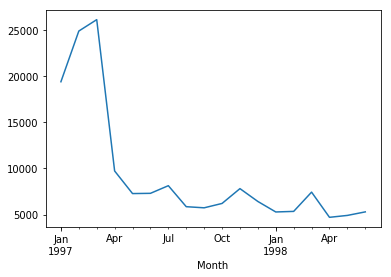

In [11]:
# 按月份进行分析
CDNow.groupby('Month').Order_product.sum().plot() # 按月对商品销售进行分析

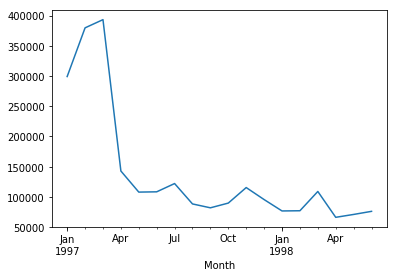

In [12]:
CDNow.groupby('Month').Order_amount.sum().plot() # 按月对商品销售额进行分析

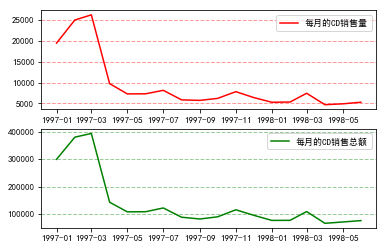

In [15]:
# 在图标右上方加上标签信息
order_month = CDNow.groupby('Month')['Order_product'].sum() # 每月的CD销售量
month_total = CDNow.groupby('Month')['Order_amount'].sum() # 每月的CD销售总额

plt.rc('font', family = 'simhei', size = 9)

plt.subplot(2, 1, 1)
plt.plot(order_month, 'red', label = '每月的CD销售量')
plt.grid(color = 'red', linestyle = '--', linewidth = 1, axis = 'y', alpha = 0.4)
plt.legend(loc = 1)

plt.subplot(2, 1, 2)
plt.plot(month_total, 'green', label = '每月的CD销售总额')
plt.grid(color = 'green', linestyle = '--', linewidth = 1, axis = 'y', alpha = 0.4)
plt.legend(loc = 0)

plt.show()

> - **结合图表，对每月的CD销售量和销售金额进行分析：**

> - **每月的CD销售量和销售金额整体变化趋势相似，尤其是在前三个月的销售量和销售金额，而随后的几个月趋于平稳**

> - **分析出现该情况的原因：**

> - 1.早期用户存在异常值

> - 2.其他未知因素

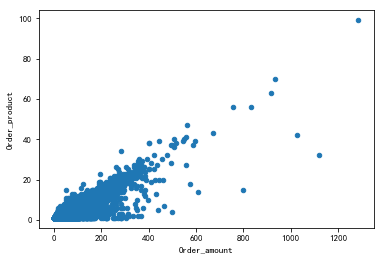

In [16]:
# 绘制散点图和直方图（用户购买数量和消费金额）
CDNow.plot.scatter(x = 'Order_amount', y = 'Order_product')

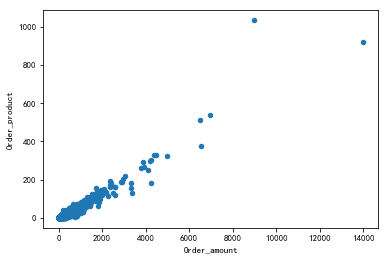

In [17]:
CDNow.groupby('User_id').sum().plot.scatter(x = 'Order_amount', y = 'Order_product') # 根据用户id进行分组

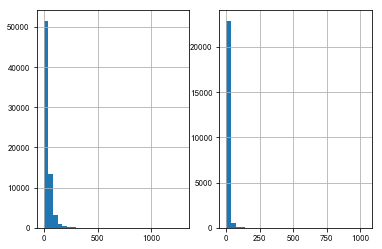

In [18]:
# 绘制直方图
plt.Figure(figsize = (30, 8))
plt.subplot(121)
CDNow.Order_amount.hist(bins = 30)

plt.subplot(122)
CDNow.groupby('User_id').Order_product.sum().hist(bins = 30)

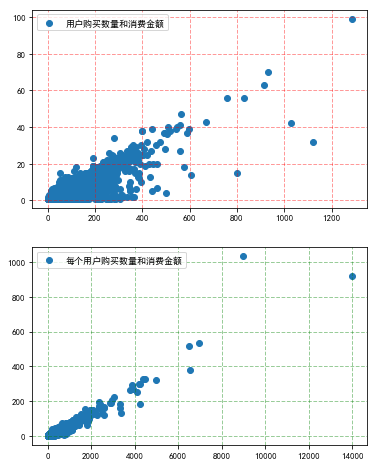

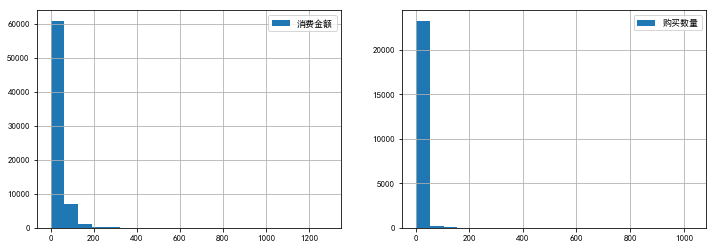

In [19]:
# 对绘制的散点图和直方图追加标签信息
user_buy = CDNow.groupby('User_id').sum()
plt.rc('font', family = 'simhei', size = 9)
plt.figure(figsize = (6, 8))
plt.subplot(2, 1, 1)
plt.scatter(CDNow['Order_amount'], CDNow['Order_product'])
plt.grid(color = 'red', linestyle = '--', linewidth = 1, alpha = 0.4)
plt.legend(['用户购买数量和消费金额'], loc = 2)

plt.subplot(2, 1, 2)
plt.scatter(user_buy['Order_amount'], user_buy['Order_product'])
plt.grid(color = 'green', linestyle = '--', linewidth = 1, alpha = 0.4)
plt.legend(['每个用户购买数量和消费金额'], loc = 2)

plt.show()

plt.rc('font', family = 'simhei', size = 9)
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
CDNow['Order_amount'].hist(bins = 20)
plt.legend(['消费金额'], loc = 1)
plt.subplot(1, 2, 2)
CDNow.groupby('User_id')['Order_product'].sum().hist(bins = 20)
plt.legend(['购买数量'], loc = 1)
plt.show()

> - **从订单的散点图分析：订单消费金额和订单商品数量呈现一定的规律性，出现的极值情况较少**

> - **从用户的散点图分析：各用户购买数量和消费金额的规律性较强，即商品数量和消费金额呈线性关系，其离群点较少（离群点可视为消费能力较强的用户），可以通过直方图进一步分析**

> - **从直方图分析：符合‘二八定律’，即大部分用户消费能力不高，高消费用户起主导作用，数量却极少**

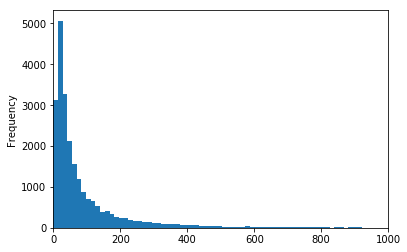

In [22]:
CDNow.groupby('User_id').sum().Order_amount.plot(kind = 'hist', bins = 1000, xlim = (0,1000))

In [20]:
# 用户消费的时间节点
# DataFrame或Series.value_counts返回的该对象中唯一的元素个数
CDNow.groupby('User_id').Month.min().value_counts() # 用户第一次消费时间

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: Month, dtype: int64

> - **groupby函数的作用是根据用户id进行分组，求得月份的最小值，即用户消费行为中的第一次消费时间**

> - **分析可知：所有用户的第一次消费的时间都集中在前三个月**

In [21]:
CDNow.groupby('User_id').Month.max().value_counts() # 用户最后一次的消费时间

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: Month, dtype: int64

> - **分析用户的最后一次消费时间：绝大部分的数据也是集中在前三个月，之后的时间段内，用户的消费缓慢减慢**

> - **异常趋势的原因：用户的第一次和最后一次消费的时间大部分集中在前三个月，导致前三个月的数据异常过高的情况**

## 复购率

> ### 1. 将用户消费数据进行数据透视

In [34]:
# 将用户消费数据进行数据透视 NAN值用0填充
pivoted_counts = CDNow.pivot_table(index = 'User_id',\
                                   columns = 'Month',\
                                   values = 'Order_dt',\
                                   aggfunc = 'count').fillna(0)
columns_month = CDNow.Month.sort_values().astype('str').unique() # sort_values 排序函数 将日期转换成唯一的字符类型
pivoted_counts.columns = columns_month
pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
User_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


> ### 2. 计算复购率（指某个时间段内重复消费两次及以上的用户，在用户总消费中的占比）

In [37]:
# applymap是DataFrame数据类型的函数
# map函数是Series数据类型的函数，apply函数的操作对象是DataFrame数据类型的一列或一行数据
# applymap函数作用于每个DataFrame的各个数据，map对Series中的每个数据调用一次搜索函数
pivoted_counts_transf = pivoted_counts.applymap(lambda x: 1 if x > 1 else np.NaN if x == 0 else 0)
pivoted_counts_transf.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
User_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


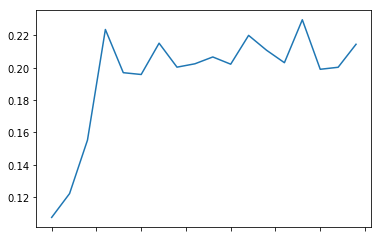

In [40]:
(pivoted_counts_transf.sum() / pivoted_counts_transf.count()).plot()

> - **复购率：指某个时间段内重复消费两次及以上的用户，在用户总消费中的占比，处理的时间窗口按月计算**

> - **数据转换：消费两次及以上记为1，消费一次记为0，没有消费记为NAN**

> - **用求和sum 函数和计数count函数都会忽略NAN的情况，进行相除操作，即可求出复购率，NAN为没有消费的用户，count对0,1情况都会统计，即总的消费用户数，sum计算的是两次及以上的消费用户**

> - **根据图表分析复购率：早期新用户的复购率不是很高，而后期的用户，其复购率较为稳定，约为20%**

### 3. 回购率（某一时间段内消费的用户，在下一个时间段内也会消费的占比）

In [42]:
# 计算回购率
# 将消费金额进行数据透视
pivoted_amount = CDNow.pivot_table(index = 'User_id',\
                                   columns = 'Month',\
                                   values = 'Order_amount',\
                                   aggfunc = 'mean').fillna(0)
columns_month = CDNow.Month.sort_values().astype('str').unique()
pivoted_amount.columns = columns_month
pivoted_amount.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
User_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [43]:
# 利用applymap函数和lambda匿名函数进行数据转换，有过购买记为1，否则为0
pivoted_purchase = pivoted_amount.applymap(lambda x : 1 if x > 0 else 0)
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
User_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [1]:
# pivoted_purchase = pivoted_amount.applymap(lambda x : 1 if x > 0 else 0)
# pivoted_purchase.head()

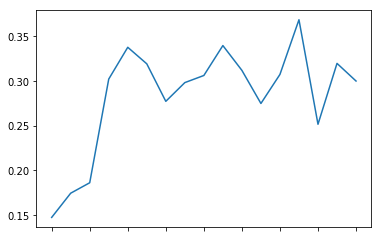

In [45]:
常见一个函数purchase_return，user为输入的数据（即用户的总消费记录）
def purchase_return(user):
         status = [] # 定义一个状态空列表，用于保存用户是否回购
         for i in range(18): # 从0-17循环遍历
             if user[i] >= 1: # 如果用户本月进行消费，并且下月也消费过，则记为1，
                 if user[i + 1] >= 1:
                     status.append(1)
                 else: # 没有消费过，记为0
                     status.append(0)
             else:
                 status.append(np.NaN) # 如果本月没有消费，则记为NAN，将对其进行排除
         status.append(np.NaN)
         return pd.Series(status,index =columns_month)
# apply函数作用于所有行，即每一个用户上，获取所要结果
pivoted_purchase_return = pivoted_counts.apply(purchase_return, axis = 1)
(pivoted_purchase_return.sum() / pivoted_purchase_return.count()).plot()

> - **从回购率的图表分析：其波动性较大，新用户的回购率在15%左右，老用户在30%左右**

> - **从复购率和回购率整体分析：老用户的回购率较好，即忠实度较高，新用户的整体表现低于老用户（与直觉相符）**

## 4. 用户分层

> ### 按用户消费行为进行分层划分

> - **新用户**

> - **活跃用户**

> - **不活跃用户**

> - **回流用户**

> - **潜在用户（unreg）定义为注册，但未消费**

> - **新用户（new）定义为第一次消费**

> - **活跃用户（active）定义为老用户，即在某一个时间窗口内有消费**

> - **不活跃用户（unactive）定义为在某一时间窗口内没有消费的老用户**

> - **回流用户（return）定义为上一个窗口内未消费，而在当前窗口内有消费**

In [46]:
# 创建用户分层函数
# 主要分为两部分的判断，以本月是否消费为界
# 本月若无消费，还要额外判断其是否为新用户，如果是新用户，则为unreg；如果是老用户，则为unactive。
# 本月若有消费，需要判断是否第一次消费，上一个时间段有无消费
def active_status(user):
    status = []
    for i in range(18):
        if user[i] == 0: # 本月未消费
            if len(status) > 0:
                if status[i-1] == 'unreg': # 注册，但未消费
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        else: # 本月有消费
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status,index = columns_month)

pivoted_purchase_status = pivoted_purchase.apply(lambda x:active_status(x), axis = 1)
pivoted_purchase_status.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
User_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [47]:
purchase_status_counts = pivoted_purchase_status.replace('unreg', np.NaN).apply(lambda x:pd.value_counts(x))
purchase_status_counts

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1155.0,1680,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624,632.0,512.0,472.0,569.0,517.0,458.0,446.0
new,7814.0,8455.0,7231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1402,1232.0,1025.0,1079.0,1489.0,919.0,1030.0,1060.0
unactive,NaN,6659.0,13994,20678.0,21286.0,21161.0,21320.0,21728.0,21761.0,21661.0,21474,21638.0,21965.0,21951.0,21444.0,22066.0,22014.0,21996.0


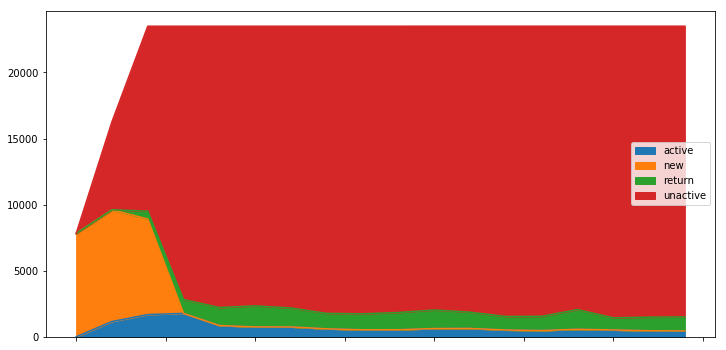

In [48]:
purchase_status_counts.fillna(0).T.plot.area(figsize = (12,6))

> - **对不同用户进行分层分析：**

> - **关注return回流用户和active活跃用户，用户数量较为稳定**

> - **将return和active用户相加，即用户的消费占比**

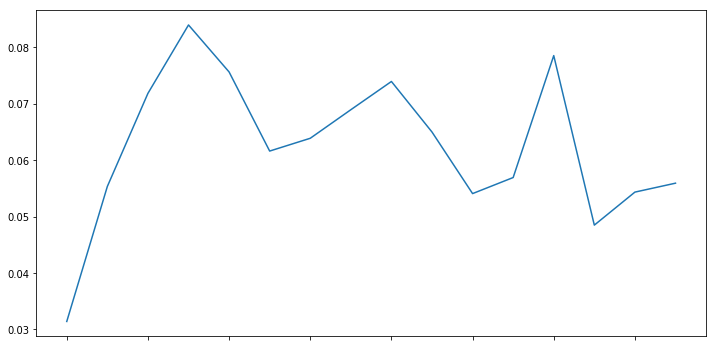

In [49]:
return_rate = purchase_status_counts.apply(lambda x:x / x.sum(), axis = 1)
return_rate.loc['return'].plot(figsize = (12,6)) 

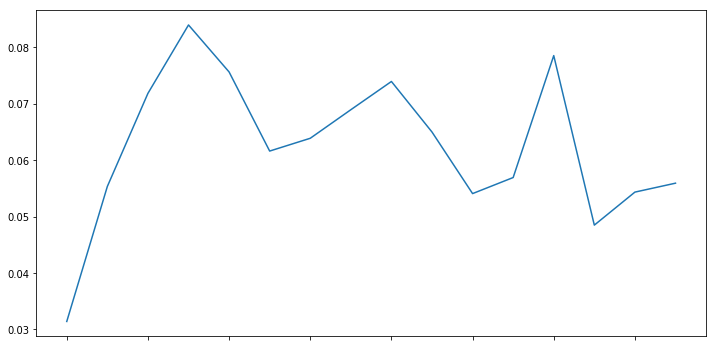

In [50]:
return_rate.loc['return'].plot(figsize = (12,6))

In [ ]:
# 对图表追加标签
return_rate = purchase_status_counts.apply(lambda x:x / x.sum(), axis = 1)
plt.rc('font', family = 'simhei', size = 9)
plt.subplot(211)
plt.title("回流用户占比")
plt.plot(return_rate.loc['return'])

plt.subplot(212)
plt.title("活跃用户占比")
plt.plot(return_rate.loc['active'])

plt.show()

> - **回流用户占比有下降的趋势，回流占比（即回流用户在总用户中的占比）在0.05-0.08**

> - **活跃用户占比下降趋势更为明显，活跃占比在0.03-0.05，与回流用户占比不同的是，活跃用户可视为连续消费的用户，一般而言是高于回流用户的**

> - **综合回流用户和活跃用户分析（存在疑问，不好分析？？）**

## 5. 用户质量分析

In [52]:
# 计算用户消费的金额
user_amount = CDNow.groupby('User_id').Order_amount.sum().sort_values().reset_index()
print(user_amount)
user_amount['amount_cumsum'] = user_amount.Order_amount.cumsum()
print(user_amount)
# 新建一个对象，按用户的消费金额生序。使用cumsum，它是累加函数。逐行计算累计的金额，计算其总消费金额
amount_total = user_amount.amount_cumsum.max()
# 转换为百分比
user_amount['prop'] = user_amount.apply(lambda x:x.amount_cumsum / amount_total, axis =1)
user_amount.tail()

       User_id  Order_amount
0        10175          0.00
1         4559          0.00
2         1948          0.00
3          925          0.00
4        10798          0.00
5        19314          0.00
6        21690          0.00
7        10664          0.00
8         4384          0.00
9         6395          0.00
10       19384          0.00
11       23157          0.00
12         455          0.00
13        2556          0.00
14        1987          0.00
15        9853          0.00
16        9835          0.00
17        6920          0.00
18         908          0.00
19        9710          0.00
20       13434          0.00
21       19189          0.00
22       12366          0.00
23       16132          0.00
24        5567          0.00
25        5301          0.00
26       11955          0.00
27       11940          0.00
28        1753          0.00
29       18861          0.00
...        ...           ...
23540    22492       2388.72
23541     3901       2411.53
23542    16175

,User_id,Order_amount,amount_cumsum,prop
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404
23569,7592,13990.93,2500315.63,1.000000


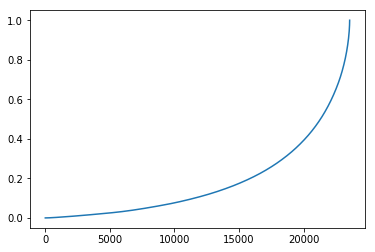

In [53]:
user_amount.prop.plot()

In [ ]:
# 统计消费量
user_count = CDNow.groupby('User_id').Order_product.sum().sort_values().reset_index()
user_count['count_cumsum'] = user_count.Order_product.cumsum()
count_total = user_count.count_cumsum.max()
user_count['prop'] = user_count.apply(lambda x:x.count_cumsum / count_total, axis =1)
plt.rc('font', family = 'simhei', size = 9)
plt.subplot(211)
plt.title("消费金额占比")
plt.plot(user_amount.loc['prop'])
plt.grid(color = 'red', linestyle = '--', linewidth = 1, alpha = 0.4)

plt.subplot(212)
plt.title("消费量占比")
plt.plot(user_count.loc['prop'])
plt.grid(color = 'red', linestyle = '--', linewidth = 1, alpha = 0.4)

plt.show()

> - **横坐标是根据消费金额大小排序生成的**

> - **纵坐标是用户累计消费**

> - **二八定律**

> - **40%的消费为前20，000位用户，60%的消费为后4，000位用户**

> - **在销量方面：前20,000位用户贡献了45%的销量，后4,000位用户贡献了55%的销量（二八定律）**

## 6. 用户生命周期

In [54]:
# 计算用户生命周期
user_purchase = CDNow[['User_id','Order_product','Order_amount','Order_date']]
# 计算用户第一次和最后一次的消费时间
order_date_min = user_purchase.groupby('User_id').Order_date.min()
order_date_max = user_purchase.groupby('User_id').Order_date.max()
# 两者相减，即得出每位用户的生命周期（life_cycle）
(order_date_max - order_date_min).head(10)

User_id
1      0 days
2      0 days
3    511 days
4    345 days
5    367 days
6      0 days
7    445 days
8    452 days
9    523 days
10     0 days
Name: Order_date, dtype: timedelta64[ns]

In [55]:
# 用户的平均生命周期为134天，需要结合其分布的规律 注意数据类型为 Timedelta，需要将其转换为数值型
(order_date_max - order_date_min).mean()

Timedelta('134 days 20:55:36.987696')

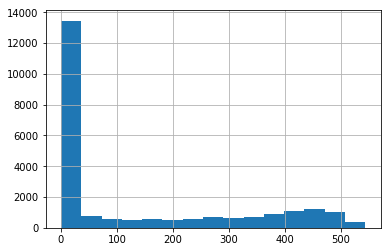

In [56]:
# 绘制生命周期分布 通过直除 timedelta4 函数进行换算
((order_date_max - order_date_min) / np.timedelta64(1,'D')).hist(bins = 15)

> - **由上图表分析：大部分用户的生命周期集中在前端，可以剔除只消费一次的用户，计算消费两次及以上的用户的生命周期**

In [57]:
life_time = (order_date_max - order_date_min).reset_index()
life_time.head()

,User_id,Order_date
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days


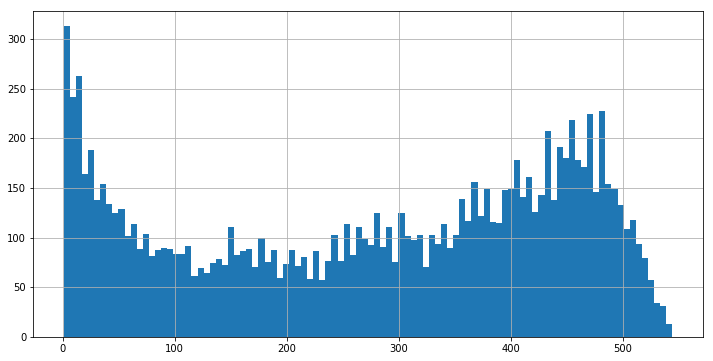

In [59]:
life_time['life_time'] = life_time.Order_date / np.timedelta64(1,'D')
life_time[life_time.life_time > 0].life_time.hist( bins = 100, figsize = (12,6)) # 剔除只消费一次的用户

> - **由上图表分布分析：呈现双峰趋势图，部分用户集中在0天，在用户首次消费30天时，需要尽量引导用户**

> - **少部分用户集中在50-300天，属于一般用户生命周期，而高质量用户的生命周期集中在400天之后，属于忠实Fans**

In [60]:
life_time[life_time.life_time > 0].life_time.mean() # 计算消费两次及以上的用户的平均生命周期

276.0448072247308

## 7. 留存率

> - **留存率，指用户在第一次消费后，有多少比率进行第二次消费**

> - **与回流率的区别是留存更倾向于计算第一次消费**

In [62]:
# 计算留存率
# merge函数的用法，类似于SQL的join操作，作用是将两个DataFrame进行合并（选择inner方式）
# merge的目的是，将用户消费行为和第一次消费的时间对应，形成一个新的DtaFrame
# suffixes表示如果合并的内容中有重名列，则加上后缀
user_purchase_retention = pd.merge(left = user_purchase,\
                                   right = order_date_min.reset_index(),\
                                   how = 'inner',\
                                   on = 'User_id',\
                                   suffixes = ('','_min'))
user_purchase_retention.head(10)

,User_id,Order_product,Order_amount,Order_date,Order_date_min
0,1,1,11.77,1997-01-01,1997-01-01
1,2,1,12.00,1997-01-12,1997-01-12
2,2,5,77.00,1997-01-12,1997-01-12
3,3,2,20.76,1997-01-02,1997-01-02
4,3,2,20.76,1997-03-30,1997-01-02
5,3,2,19.54,1997-04-02,1997-01-02
6,3,5,57.45,1997-11-15,1997-01-02
7,3,4,20.96,1997-11-25,1997-01-02
8,3,1,16.99,1998-05-28,1997-01-02
9,4,2,29.33,1997-01-01,1997-01-01


In [65]:
# 将Order_date与Order_date_min相减，得到一个新的列，即用户每次消费距第一次消费的时间差
user_purchase_retention['order_date_diff'] = user_purchase_retention.Order_date - user_purchase_retention.Order_date_min
user_purchase_retention.head()

,User_id,Order_product,Order_amount,Order_date,Order_date_min,order_date_diff
0,1,1,11.77,1997-01-01,1997-01-01,0 days
1,2,1,12.00,1997-01-12,1997-01-12,0 days
2,2,5,77.00,1997-01-12,1997-01-12,0 days
3,3,2,20.76,1997-01-02,1997-01-02,0 days
4,3,2,20.76,1997-03-30,1997-01-02,87 days


In [66]:
# 将日期转换成时间数据类型
date_trans = lambda x:x / np.timedelta64(1,'D')
user_purchase_retention['date_diff'] = user_purchase_retention.order_date_diff.apply(date_trans)
user_purchase_retention.head(10)

,User_id,Order_product,Order_amount,Order_date,Order_date_min,order_date_diff,date_diff
0,1,1,11.77,1997-01-01,1997-01-01,0 days,0.0
1,2,1,12.00,1997-01-12,1997-01-12,0 days,0.0
2,2,5,77.00,1997-01-12,1997-01-12,0 days,0.0
3,3,2,20.76,1997-01-02,1997-01-02,0 days,0.0
4,3,2,20.76,1997-03-30,1997-01-02,87 days,87.0
5,3,2,19.54,1997-04-02,1997-01-02,90 days,90.0
6,3,5,57.45,1997-11-15,1997-01-02,317 days,317.0
7,3,4,20.96,1997-11-25,1997-01-02,327 days,327.0
8,3,1,16.99,1998-05-28,1997-01-02,511 days,511.0
9,4,2,29.33,1997-01-01,1997-01-01,0 days,0.0


In [67]:
# 将时间差值分桶
# 分桶的目的是用户当前消费时间距第一次消费属于哪个时间段（0-3,3-5,5-7，...,180-365）
bin = [0,3,5,7,15,30,60,90,180,365]
user_purchase_retention['date_diff_bin'] = pd.cut(user_purchase_retention.date_diff, bins = bin)
user_purchase_retention.head(20)
# 注意date_diff为0的情况，对其不进行分桶
# 当用户仅仅=消费一次的情况，留存率视为0；当用户第一天消费了多次，而之后没有消费，同样视为0

,User_id,Order_product,Order_amount,Order_date,Order_date_min,order_date_diff,date_diff,date_diff_bin
0,1,1,11.77,1997-01-01,1997-01-01,0 days,0.0,NaN
1,2,1,12.00,1997-01-12,1997-01-12,0 days,0.0,NaN
2,2,5,77.00,1997-01-12,1997-01-12,0 days,0.0,NaN
3,3,2,20.76,1997-01-02,1997-01-02,0 days,0.0,NaN
4,3,2,20.76,1997-03-30,1997-01-02,87 days,87.0,"(60, 90]"
5,3,2,19.54,1997-04-02,1997-01-02,90 days,90.0,"(60, 90]"
6,3,5,57.45,1997-11-15,1997-01-02,317 days,317.0,"(180, 365]"
7,3,4,20.96,1997-11-25,1997-01-02,327 days,327.0,"(180, 365]"
8,3,1,16.99,1998-05-28,1997-01-02,511 days,511.0,NaN
9,4,2,29.33,1997-01-01,1997-01-01,0 days,0.0,NaN


In [68]:
# 数据透视操作
# 结果是用户在第一次消费之后，在后续各时间段内的消费总额
pivoted_retention = user_purchase_retention.pivot_table(index = 'User_id',\
                                                        columns = 'date_diff_bin',\
                                                        values = 'Order_amount',\
                                                        aggfunc = sum)
pivoted_retention.head(10)

date_diff_bin,"(0, 3]","(3, 5]","(5, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
User_id,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,40.3,NaN,78.41
4,NaN,NaN,NaN,NaN,29.73,NaN,NaN,NaN,41.44
5,NaN,NaN,NaN,13.97,NaN,38.90,NaN,110.40,155.54
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.43
8,NaN,NaN,NaN,NaN,NaN,13.97,NaN,45.29,104.17
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.33,NaN


In [69]:
pivoted_retention.mean() # 用户在后续的各时间段内的平均消费

date_diff_bin
(0, 3]        35.905798
(3, 5]        36.225332
(5, 7]        34.622935
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

In [70]:
# 将数据转换成0,1 1表示在该段时间内有后续消费，0表示没有
pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x:1 if x > 0 else 0)
pivoted_retention_trans.head()

date_diff_bin,"(0, 3]","(3, 5]","(5, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
User_id,,,,,,,,,
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1
4,0,0,0,0,1,0,0,0,1
5,0,0,0,1,0,1,0,1,1


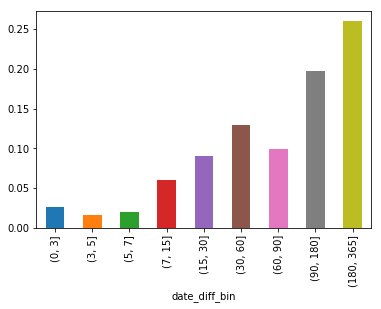

In [72]:
(pivoted_retention_trans.sum() / pivoted_retention_trans.count()).plot.bar()

> - **由以上图表分析：**

> - **只有2.5%的用户在第一次消费的次日到第三天有过消费**

> - **3%的用户在3-7天内有消费**

> - **20%的用户在第一次消费后的三个月到半年之间有过消费**

> - **27%的用户在半年后至1年内有过购买**

In [73]:
# 根据用户id将用户留存率进行分组
grouped = user_purchase_retention.groupby('User_id')
i = 0
for user, group in grouped:
    print(group)
    i += 1
    if i == 2:
        break

   User_id  Order_product  Order_amount Order_date Order_date_min  \
0        1              1         11.77 1997-01-01     1997-01-01   

  order_date_diff  date_diff date_diff_bin  
0          0 days        0.0           NaN  
   User_id  Order_product  Order_amount Order_date Order_date_min  \
1        2              1          12.0 1997-01-12     1997-01-12   
2        2              5          77.0 1997-01-12     1997-01-12   

  order_date_diff  date_diff date_diff_bin  
1          0 days        0.0           NaN  
2          0 days        0.0           NaN  


In [75]:
# 创建用户的平均消费周期 计算用户的平均购买周期
# 返回的数据类型为DtaFrame
def diff(group): # 计算每位用户两次消费的时间间隔
#     将用户上下两次的消费时间相减求出消费间隔
# shift函数是一个偏移函数
# x.shift()表示向上偏移一个位置，x.shift(-1)表示向下偏移一个位置（计算用户下一次距本次消费的时间间隔，即可用shift(-1），设定axis为1表示左右偏移
    d = group.date_diff - group.date_diff.shift(-1)
    return d
last_diff = user_purchase_retention.groupby('User_id').apply(diff)
last_diff.head()

User_id   
1        0     NaN
2        1     0.0
         2     NaN
3        3   -87.0
         4    -3.0
Name: date_diff, dtype: float64

In [79]:
x = pd.Series([1, 2, 3, 4, 5])
x

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [80]:
x.shift() # x.shift()表示向上偏移一个位置

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [81]:
x.shift(-1) # x.shift(-1)表示向下偏移一个位置

0    2.0
1    3.0
2    4.0
3    5.0
4    NaN
dtype: float64

In [76]:
last_diff.mean() # 用 mean 均值函数计算用户的平均消费间隔时间是 68 天

-68.97376814424265

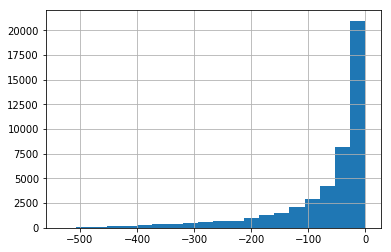

In [77]:
last_diff.hist(bins = 20) # 绘制用户消费间隔时间的柱状图

> - **由以上柱状图分析：该直方图分布为长尾分布，大部分用户消费的时间间隔一般较短**

> - **拓展-进一步假设分析：可以试图将时间找回点设为消费后立即赠送优惠券，消费后10天对用户的消费进行问卷反馈，消费后30天提醒优惠券到期，消费后60天可以通过短信消息推送**

> - **挖掘潜在有价值的信息：**

> - 1.前三月新用户的留存率有无差异？

> - 2.用户在不同生命周期的消费合计信息呈现何种趋势？

> - 3.设定不同的消费留存划分方法，观察效果

> - 4.可以将自定义的函数封装成类，后续遇到相似的问题，可以直接调用或重载

> - ## 总结（优秀内容总结与输出）

> ** [Task 01：Python语法基础](https://github.com/Hirotransfer/Python-for-Data-Analysis-2nd-/blob/master/Day%2001/Notebooks/01%20Python-%E8%AF%AD%E6%B3%95%E5%9F%BA%E7%A1%80.ipynb)**

> ** [Task 02：1. Pythin的数据结构、函数、文件和Numpy基础](https://github.com/HiaGhost/ch03-04)**

> ** [Task 02：2. Basic_Numpy](https://github.com/JRXGUGI/pydata_for_analysis/blob/master/chapter04%20Basic%20Numpy%20-%20py36.ipynb)**

> ** [Task 03：Pandas入门和数据加载、存储和文件格式](https://github.com/HiaGhost/ch05-06)**

> ** [Task 04：数据清洗、准备和数据规整](http://t.cn/Exb3MJG)**

> ** [Task 05：数据聚合、分组操作和绘图、可视化操作](http://t.cn/Exb3Bxt)**

> ** [Task 06：Hanyi-数据分析-Ch11~12](http://t.cn/Exbujxk)**

> ** [Task 07：Python建模库和数据分析案例](https://github.com/pandawang830/test/blob/master/47-Hanyi-%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90-Ch13%7E14.ipynb)**

> **优秀笔记：**

<img align="left" style="padding-left:1px;" src="Dataset/1.jpg">

<img align="left" style="padding-left:1px;" src="Dataset/2.jpg">

<img align="left" style="padding-left:1px;" src="Dataset/3.jpg">

<img align="left" style="padding-left:1px;" src="Dataset/4.jpg">

# For Everyone:


> **Stay Hungry, Stay Foolish**


> **For the Learner, For the Leader, For the Future**


> **Always Keep the Faith, Hope to the End**

# For Real Friends:

> **We are the champions, my friends, and we'll keep on fighting till the world!**